In [1]:
import os
import codecs

In [3]:
content_length = []
for file in os.listdir('./round1_train/train'):
    if not file.endswith(".txt"):  
        pass
    else:
        with codecs.open('./round1_train/train/'+file, "r", encoding="utf-8") as f:
            content_str = f.read()
            content_length.append(len(content_str))

            

In [4]:
import numpy as np
import pandas as pd

In [5]:
np.percentile(content_length,95)

814.2499999999998

In [6]:
content_length = pd.Series(content_length)

In [7]:
content_length[content_length>500].shape

(212,)

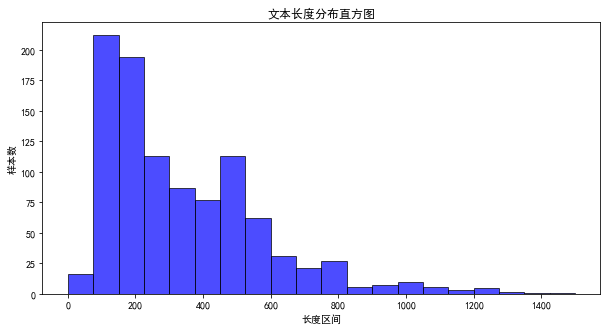

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
plt.figure(figsize=(10,5))
plt.hist(content_length, bins=20, range=(0,1500),facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("长度区间")
# 显示纵轴标签
plt.ylabel("样本数")
# 显示图标题
plt.title("文本长度分布直方图")
plt.show()

# 标签分布

In [10]:
df = pd.DataFrame()
for file in os.listdir('./round1_train/train'):
    if not file.endswith(".ann"):  
        pass
    else:
        dta = pd.read_csv('./round1_train/train/'+file, sep='\t', names=['id','entityInfo','entity'])
        dta['category'] = dta['entityInfo'].apply(lambda x:x.split(' ')[0])
        dta['pe1'] = dta['entityInfo'].apply(lambda x:x.split(' ')[1]).astype(int)
        dta['pe2'] = dta['entityInfo'].apply(lambda x:x.split(' ')[2]).astype(int)
        dta = dta[['id','entity','category','pe1','pe2']]       
        df = pd.concat([df,dta])

            

In [19]:
df.groupby("category").count().reset_index()[['category','id']].sort_values(by='id',ascending=False)

,category,id
11,SYMPTOM,6090
4,DRUG_EFFICACY,3257
10,PERSON_GROUP,1718
12,SYNDROME,1206
7,DRUG_TASTE,1133
0,DISEASE,1104
3,DRUG_DOSAGE,1016
6,DRUG_INGREDIENT,728
9,FOOD_GROUP,641
1,DISEASE_GROUP,623


In [12]:
df.groupby("entity").count().reset_index()[['entity','id']].sort_values(by='id',ascending=False)

,entity,id
780,孕妇,493
252,儿童,365
1311,月经不调,331
3087,过敏体质者,232
1853,生冷,224
...,...,...
1511,活动力差,1
1513,活络消肿,1
1516,活血养血,1
1520,活血化阏,1


# 测试样本分析

In [13]:
content_length = []
for file in os.listdir('./round1_test/chusai_xuanshou/'):
    if not file.endswith(".txt"):  
        pass
    else:
        with codecs.open('./round1_test/chusai_xuanshou/'+file, "r", encoding="utf-8") as f:
            content_str = f.read()
            content_length.append(len(content_str))

            

In [14]:
content_length = pd.Series(content_length)

In [15]:
content_length[content_length>500].shape

(65,)

In [16]:
content_length[content_length>500]

6       692
20      781
23     1200
29      636
48      783
       ... 
445     571
463     579
475     814
484     771
493     976
Length: 65, dtype: int64

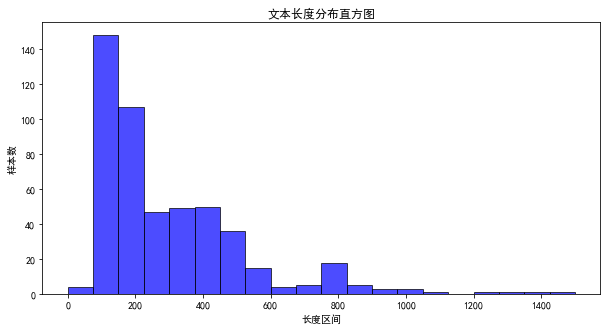

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
plt.figure(figsize=(10,5))
plt.hist(content_length, bins=20, range=(0,1500),facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("长度区间")
# 显示纵轴标签
plt.ylabel("样本数")
# 显示图标题
plt.title("文本长度分布直方图")
plt.show()

# 难点分析
- 数据量少
- 标签数据分布不平衡
- 领域专业性较强
- 文本长度较长